### 🔧 环境配置和检查

#### 概述

本教程需要特定的环境配置以确保最佳学习体验。以下配置将帮助您：

- 使用统一的conda环境：激活统一的学习环境
- 通过国内镜像源快速安装依赖：配置pip使用清华镜像源
- 加速模型下载：设置HuggingFace镜像代理
- 检查系统配置：检查硬件和软件配置

#### 配置

- **所需环境及其依赖已经部署好**
- 在`Notebook`右上角选择`jupyter内核`为`python(flyai_agent_in_action)`，即可执行下方代码

In [ ]:
%%script bash

# 1. 激活 conda 环境 (仅对当前单元格有效)
eval "$(conda shell.bash hook)"
conda activate agent101

echo "========================================="
echo "== Conda 环境检查报告 (仅针对当前 Bash 子进程) =="
echo "========================================="

# 2. 检查当前激活的环境
CURRENT_ENV_NAME=$(basename $CONDA_PREFIX)

if [ "$CURRENT_ENV_NAME" = "agent101" ]; then
    echo "✅ 当前单元格已成功激活到 agent101 环境。"
    echo "✅ 正在使用的环境路径: $CONDA_PREFIX"
    echo ""
    echo "💡 提示: 后续的 Python 单元格将使用 Notebook 当前选择的 Jupyter 内核。"
    echo "   如果需要后续单元格也使用此环境，请执行以下操作:"
    echo "   1. 检查 Notebook 右上角是否已选择 'python(agent101)'。"
else
    echo "❌ 激活失败或环境名称不匹配。当前环境: $CURRENT_ENV_NAME"
    echo ""
    echo "⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(agent101)'。"
    echo "   (通常位于 Notebook 右上角或 '内核' 菜单中)"
    echo ""
    echo "📚 备用方法 (不推荐): 如果无法切换内核，则必须在**每个**代码单元格的头部重复以下命令:"
    echo ""
    echo "%%script bash"
    echo "# 必须在每个单元格都执行"
    echo "eval \"\$(conda shell.bash hook)\""
    echo "conda activate agent101"
fi

echo "=========================================" 


EnvironmentNameNotFound: Could not find conda environment: flyai_agent_in_action
You can list all discoverable environments with `conda info --envs`.




== Conda 环境检查报告 (仅针对当前 Bash 子进��) ==
❌ 激活失败或环境名称不匹配。当前环境: miniconda3

⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(flyai_agent_in_action)'。
   (通常位��� Notebook 右上角或 '内核' 菜单中)

📚 备用方法 (不推荐): 如果无法切换内��，则必须在**每个**代码单元格的头部重复以下命令:

%%script bash
# 必须在每���单元格都执行
eval "$(conda shell.bash hook)"
conda activate flyai_agent_in_action


In [2]:
# 2. 设置pip 为清华源
%pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
%pip config list


Writing to /root/.config/pip/pip.conf
Note: you may need to restart the kernel to use updated packages.
global.index-url='https://pypi.tuna.tsinghua.edu.cn/simple'
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 3. 设置HuggingFace代理
%env HF_ENDPOINT=https://hf-mirror.com
# 验证：使用shell命令检查
!echo $HF_ENDPOINT

env: HF_ENDPOINT=https://hf-mirror.com
https://hf-mirror.com


In [4]:
# 🔍 环境信息检查脚本
#
# 本脚本的作用：
# 1. 安装 pandas 库用于数据表格展示
# 2. 检查系统的各项配置信息
# 3. 生成详细的环境报告表格
#
# 对于初学者来说，这个步骤帮助您：
# - 了解当前运行环境的硬件配置
# - 确认是否满足模型运行的最低要求
# - 学习如何通过代码获取系统信息

# 安装 pandas 库 - 用于创建和展示数据表格
# pandas 是 Python 中最流行的数据处理和分析库
%pip install pandas==2.2.2 tabulate==0.9.0

import platform # 导入 platform 模块以获取系统信息
import os # 导入 os 模块以与操作系统交互
import subprocess # 导入 subprocess 模块以运行外部命令
import pandas as pd # 导入 pandas 模块，通常用于数据处理，这里用于创建表格
import shutil # 导入 shutil 模块以获取磁盘空间信息

# 获取 CPU 信息的函数，包括核心数量
def get_cpu_info():
    cpu_info = "" # 初始化 CPU 信息字符串
    physical_cores = "N/A"
    logical_cores = "N/A"

    if platform.system() == "Windows": # 如果是 Windows 系统
        cpu_info = platform.processor() # 使用 platform.processor() 获取 CPU 信息
        try:
            # 获取 Windows 上的核心数量 (需要 WMI)
            import wmi
            c = wmi.WMI()
            for proc in c.Win32_Processor():
                physical_cores = proc.NumberOfCores
                logical_cores = proc.NumberOfLogicalProcessors
        except:
            pass # 如果 WMI 不可用，忽略错误

    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取 CPU 信息和核心数量
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin' # 更新 PATH 环境变量
        try:
            process_brand = subprocess.Popen(['sysctl', "machdep.cpu.brand_string"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_brand, stderr_brand = process_brand.communicate()
            cpu_info = stdout_brand.decode().split(': ')[1].strip() if stdout_brand else "Could not retrieve CPU info"

            process_physical = subprocess.Popen(['sysctl', "hw.physicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_physical, stderr_physical = process_physical.communicate()
            physical_cores = stdout_physical.decode().split(': ')[1].strip() if stdout_physical else "N/A"

            process_logical = subprocess.Popen(['sysctl', "hw.logicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_logical, stderr_logical = process_logical.communicate()
            logical_cores = stdout_logical.decode().split(': ')[1].strip() if stdout_logical else "N/A"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/cpuinfo 文件获取 CPU 信息和核心数量
            with open('/proc/cpuinfo') as f:
                physical_cores_count = 0
                logical_cores_count = 0
                cpu_info_lines = []
                for line in f:
                    if line.startswith('model name'): # 查找以 'model name'开头的行
                        if not cpu_info: # 只获取第一个 model name
                            cpu_info = line.split(': ')[1].strip()
                    elif line.startswith('cpu cores'): # 查找以 'cpu cores' 开头的行
                        physical_cores_count = int(line.split(': ')[1].strip())
                    elif line.startswith('processor'): # 查找以 'processor' 开头的行
                        logical_cores_count += 1
                physical_cores = str(physical_cores_count) if physical_cores_count > 0 else "N/A"
                logical_cores = str(logical_cores_count) if logical_cores_count > 0 else "N/A"
                if not cpu_info:
                     cpu_info = "Could not retrieve CPU info"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    return f"{cpu_info} ({physical_cores} physical cores, {logical_cores} logical cores)" # 返回 CPU 信息和核心数量


# 获取内存信息的函数
def get_memory_info():
    mem_info = "" # 初始化内存信息字符串
    if platform.system() == "Windows":
        # 在 Windows 上不容易通过标准库获取，需要外部库或 PowerShell
        mem_info = "Requires external tools on Windows" # 设置提示信息
    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取内存大小
        process = subprocess.Popen(['sysctl', "hw.memsize"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # 运行 sysctl 命令
        stdout, stderr = process.communicate() # 获取标准输出和标准错误
        mem_bytes = int(stdout.decode().split(': ')[1].strip()) # 解析输出，获取内存大小（字节）
        mem_gb = mem_bytes / (1024**3) # 转换为 GB
        mem_info = f"{mem_gb:.2f} GB" # 格式化输出
    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/meminfo 文件获取内存信息
            with open('/proc/meminfo') as f:
                total_mem_kb = 0
                available_mem_kb = 0
                for line in f:
                    if line.startswith('MemTotal'): # 查找以 'MemTotal' 开头的行
                        total_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取总内存（KB）
                    elif line.startswith('MemAvailable'): # 查找以 'MemAvailable' 开头的行
                         available_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取可用内存（KB）

                if total_mem_kb > 0:
                    total_mem_gb = total_mem_kb / (1024**2) # 转换为 GB
                    mem_info = f"{total_mem_gb:.2f} GB" # 格式化输出总内存
                    if available_mem_kb > 0:
                        available_mem_gb = available_mem_kb / (1024**2)
                        mem_info += f" (Available: {available_mem_gb:.2f} GB)" # 添加可用内存信息
                else:
                     mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息

        except:
            mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息
    return mem_info # 返回内存信息

# 获取 GPU 信息的函数，包括显存
def get_gpu_info():
    try:
        # 尝试使用 nvidia-smi 获取 NVIDIA GPU 信息和显存
        result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            gpu_lines = result.stdout.strip().split('\n') # 解析输出，获取 GPU 名称和显存
            gpu_info_list = []
            for line in gpu_lines:
                name, memory = line.split(', ')
                gpu_info_list.append(f"{name} ({memory})") # 格式化 GPU 信息
            return ", ".join(gpu_info_list) if gpu_info_list else "NVIDIA GPU found, but info not listed" # 返回 GPU 信息或提示信息
        else:
             # 尝试使用 lshw 获取其他 GPU 信息 (需要安装 lshw)
            try:
                result_lshw = subprocess.run(['lshw', '-C', 'display'], capture_output=True, text=True)
                if result_lshw.returncode == 0: # 如果命令成功执行
                     # 简单解析输出中的 product 名称和显存
                    gpu_info_lines = []
                    current_gpu = {}
                    for line in result_lshw.stdout.splitlines():
                        if 'product:' in line:
                             if current_gpu:
                                 gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")
                             current_gpu = {'product': line.split('product:')[1].strip()}
                        elif 'size:' in line and 'memory' in line:
                             current_gpu['memory'] = line.split('size:')[1].strip()

                    if current_gpu: # 添加最后一个 GPU 的信息
                        gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")

                    return ", ".join(gpu_info_lines) if gpu_info_lines else "GPU found (via lshw), but info not parsed" # 如果找到 GPU 但信息无法解析，设置提示信息
                else:
                    return "No GPU found (checked nvidia-smi and lshw)" # 如果两个命令都找不到 GPU，设置提示信息
            except FileNotFoundError:
                 return "No GPU found (checked nvidia-smi, lshw not found)" # 如果找不到 lshw 命令，设置提示信息
    except FileNotFoundError:
        return "No GPU found (nvidia-smi not found)" # 如果找不到 nvidia-smi 命令，设置提示信息


# 获取 CUDA 版本的函数
def get_cuda_version():
    try:
        # 尝试使用 nvcc --version 获取 CUDA 版本
        result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            for line in result.stdout.splitlines():
                if 'release' in line: # 查找包含 'release' 的行
                    return line.split('release ')[1].split(',')[0] # 解析行，提取版本号
        return "CUDA not found or version not parsed" # 如果找不到 CUDA 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "CUDA not found" # 如果找不到 nvcc 命令，设置提示信息

# 获取 Python 版本的函数
def get_python_version():
    return platform.python_version() # 获取 Python 版本

# 获取 Conda 版本的函数
def get_conda_version():
    try:
        # 尝试使用 conda --version 获取 Conda 版本
        result = subprocess.run(['conda', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            return result.stdout.strip() # 返回 Conda 版本
        return "Conda not found or version not parsed" # 如果找不到 Conda 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "Conda not found" # 如果找不到 conda 命令，设置提示信息

# 获取物理磁盘空间信息的函数
def get_disk_space():
    try:
        total, used, free = shutil.disk_usage("/") # 获取根目录的磁盘使用情况
        total_gb = total / (1024**3) # 转换为 GB
        used_gb = used / (1024**3) # 转换为 GB
        free_gb = free / (1024**3) # 转换为 GB
        return f"Total: {total_gb:.2f} GB, Used: {used_gb:.2f} GB, Free: {free_gb:.2f} GB" # 格式化输出
    except Exception as e:
        return f"Could not retrieve disk info: {e}" # 如果获取信息出错，设置错误信息

# 获取环境信息
os_name = platform.system() # 获取操作系统名称
os_version = platform.release() # 获取操作系统版本
if os_name == "Linux":
    try:
        # 在 Linux 上尝试获取发行版和版本
        lsb_info = subprocess.run(['lsb_release', '-a'], capture_output=True, text=True)
        if lsb_info.returncode == 0: # 如果命令成功执行
            for line in lsb_info.stdout.splitlines():
                if 'Description:' in line: # 查找包含 'Description:' 的行
                    os_version = line.split('Description:')[1].strip() # 提取描述信息作为版本
                    break # 找到后退出循环
                elif 'Release:' in line: # 查找包含 'Release:' 的行
                     os_version = line.split('Release:')[1].strip() # 提取版本号
                     # 尝试获取 codename
                     try:
                         codename_info = subprocess.run(['lsb_release', '-c'], capture_output=True, text=True)
                         if codename_info.returncode == 0:
                             os_version += f" ({codename_info.stdout.split(':')[1].strip()})" # 将 codename 添加到版本信息中
                     except:
                         pass # 如果获取 codename 失败则忽略

    except FileNotFoundError:
        pass # lsb_release 可能未安装，忽略错误

full_os_info = f"{os_name} {os_version}" # 组合完整的操作系统信息
cpu_info = get_cpu_info() # 调用函数获取 CPU 信息和核心数量
memory_info = get_memory_info() # 调用函数获取内存信息
gpu_info = get_gpu_info() # 调用函数获取 GPU 信息和显存
cuda_version = get_cuda_version() # 调用函数获取 CUDA 版本
python_version = get_python_version() # 调用函数获取 Python 版本
conda_version = get_conda_version() # 调用函数获取 Conda 版本
disk_info = get_disk_space() # 调用函数获取物理磁盘空间信息


# 创建用于存储数据的字典
env_data = {
    "项目": [ # 项目名称列表
        "操作系统",
        "CPU 信息",
        "内存信息",
        "GPU 信息",
        "CUDA 信息",
        "Python 版本",
        "Conda 版本",
        "物理磁盘空间" # 添加物理磁盘空间
    ],
    "信息": [ # 对应的信息列表
        full_os_info,
        cpu_info,
        memory_info,
        gpu_info,
        cuda_version,
        python_version,
        conda_version,
        disk_info # 添加物理磁盘空间信息
    ]
}

# 创建一个 pandas DataFrame
df = pd.DataFrame(env_data)

# 打印表格
print("### 环境信息") # 打印标题
print(df.to_markdown(index=False)) # 将 DataFrame 转换为 Markdown 格式并打印，不包含索引


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
### 环境信息
| 项目         | 信息                                                                               |
|:-------------|:-----------------------------------------------------------------------------------|
| 操作系统     | Linux Ubuntu 22.04.4 LTS                                                           |
| CPU 信息     | 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz (1 physical cores, 4 logical cores) |
| 内存信息     | 5.75 GB (Available: 3.93 GB)                                                       |
| GPU 信息     | No GPU found (nvidia-smi not found)                                                |
| CUDA 信息    | CUDA not found                                                                     |
| Python 版本  | 3.10.18                                                                            |
| Conda 版本   | conda 24.4.0                                         

<a href="https://colab.research.google.com/github/FlyAIBox/langchain-academy/blob/fly101/creating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 可视化：通过 Mermaid 渲染图结构

/tmp/ipykernel_6588/4190932884.py:363: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(max_results=3)


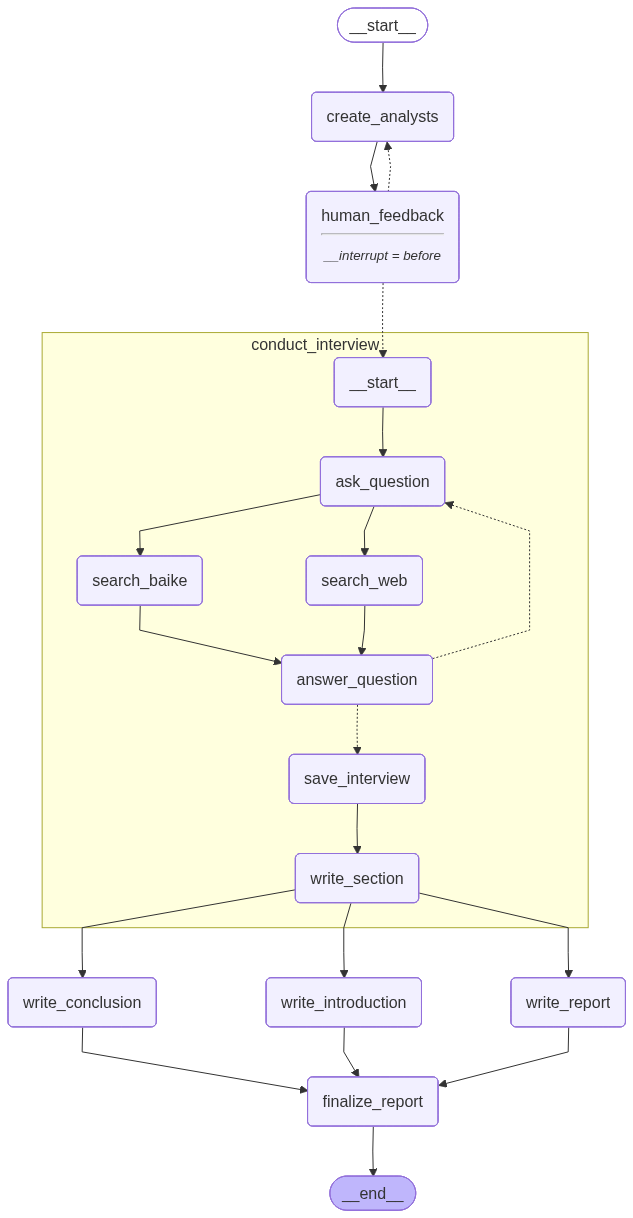

In [5]:
# 可视化：通过 Mermaid 渲染图结构
import os
import getpass
from typing import List, Annotated, Literal, Optional
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
import operator

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_core.messages import get_buffer_string
from langchain_openai import ChatOpenAI

# 导入搜索工具
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.document_loaders import WikipediaLoader

# LangGraph 相关导入
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import Send
from langgraph.graph import MessagesState

## ============================================
## 数据模型定义
## ============================================
# 定义系统中使用的核心数据结构，包括分析师、搜索查询、状态管理等

class Analyst(BaseModel):
    """
    分析师数据模型
    
    代表一个 AI 分析师的完整信息，包括其身份、角色和研究方向。
    每个分析师负责从特定视角研究主题的某个方面。
    """
    # 分析师的主要隶属机构或组织（如：麻省理工学院、世界卫生组织等）
    affiliation: str = Field(description="分析师的主要隶属机构或组织")
    
    # 分析师姓名（如：Dr. Sarah Chen、张伟博士等）
    name: str = Field(description="分析师姓名")
    
    # 分析师在研究主题中的具体角色定位（如：技术专家、政策分析师等）
    role: str = Field(description="分析师在研究主题中的具体角色定位")
    
    # 分析师的关注焦点、关切点和动机的详细描述
    description: str = Field(description="分析师的关注焦点、关切点和动机的详细描述")

    @property
    def persona(self) -> str:
        """
        生成分析师人设描述
        
        将分析师的所有信息格式化为一个完整的人设字符串，
        用于在提示词中向 LLM 介绍分析师的身份和背景。
        
        Returns:
            str: 格式化的分析师人设描述
        """
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"


class Perspectives(BaseModel):
    """
    分析师集合数据模型
    
    包含一组分析师的容器类，用于从 LLM 结构化输出中解析多个分析师。
    """
    # 包含所有分析师角色和隶属机构的综合列表
    analysts: List[Analyst] = Field(description="包含所有分析师角色和隶属机构的综合列表")


class GenerateAnalystsState(TypedDict):
    """
    分析师生成状态管理
    
    用于分析师生成工作流的状态类，包含生成分析师所需的全部上下文信息。
    支持人机协同反馈循环。
    """
    topic: str  # 研究主题（如："人工智能在医疗领域的应用"）
    max_analysts: int  # 分析师数量上限（通常为 3-5 个）
    human_analyst_feedback: str  # 人类反馈信息（用于调整和完善分析师配置）
    analysts: List[Analyst]  # 生成的分析师列表


class SearchQuery(BaseModel):
    """
    搜索查询数据模型
    
    用于结构化 LLM 输出的搜索查询字符串，确保生成的查询符合搜索引擎要求。
    """
    # 用于检索的搜索查询语句（如："AI medical diagnosis accuracy studies"）
    search_query: str = Field(None, description="用于检索的搜索查询语句")


class InterviewState(MessagesState):
    """
    访谈状态管理类
    
    继承自 MessagesState，管理单个分析师与专家访谈的完整状态。
    包含对话历史、检索上下文、分析师信息等。
    
    继承的 messages 字段：存储所有对话消息（HumanMessage 和 AIMessage）
    """
    max_num_turns: int  # 对话轮次上限（控制访谈深度，避免无限循环）
    context: Annotated[list, operator.add]  # 检索到的源文档列表（使用 operator.add 实现增量累加）
    analyst: Analyst  # 当前进行访谈的分析师对象
    interview: str  # 完整的访谈记录文本（所有对话的字符串表示）
    sections: list  # 访谈摘要小节列表（用于最终报告生成）


class ResearchGraphState(TypedDict):
    """
    研究图状态管理类
    
    管理整个研究工作流的全局状态，包括：
    - 输入配置（主题、分析师配置）
    - 中间结果（分析师列表、各个小节）
    - 最终输出（完整报告）
    
    这是整个 LangGraph 工作流的主状态类。
    """
    topic: str  # 研究主题
    max_analysts: int  # 分析师数量上限
    human_analyst_feedback: str  # 人类反馈信息（用于人机协同）
    analysts: List[Analyst]  # 分析师列表（所有生成的分析师）
    sections: Annotated[list, operator.add]  # 报告小节列表（使用 operator.add 支持并行访谈结果聚合）
    introduction: str  # 最终报告的引言部分
    content: str  # 最终报告的主体内容
    conclusion: str  # 最终报告的结论部分
    final_report: str  # 完整的最终报告（Markdown 格式）


## ============================================
## 提示词模板
## ============================================
# 定义系统中各个 AI Agent 使用的提示词模板
# 这些模板指导 LLM 完成特定任务（如生成分析师、提问、回答等）

# ---------------------------------------------
# 分析师生成提示词
# ---------------------------------------------
# 指导 LLM 根据研究主题生成多个不同视角的分析师
analyst_instructions = """你需要创建一组 AI 分析师人设。请严格遵循以下指引：

1. 先审阅研究主题：
{topic}

2. 查看（可选的）编辑反馈，它将指导分析师的人设创建：

{human_analyst_feedback}

3. 基于上述文档与/或反馈，识别最值得关注的主题。

4. 选出前 {max_analysts} 个主题。

5. 为每个主题分配一位分析师。"""

# ---------------------------------------------
# 访谈问题生成提示词
# ---------------------------------------------
# 指导分析师角色生成有深度的访谈问题
question_instructions = """你是一名分析师，需要通过访谈专家来了解一个具体主题。

你的目标是提炼与该主题相关的「有趣且具体」的洞见。

1. 有趣（Interesting）：让人感到意外或非显而易见的观点。

2. 具体（Specific）：避免泛泛而谈，包含专家提供的具体案例或细节。

以下是你的关注主题与目标设定：{goals}

请先用符合你人设的名字进行自我介绍，然后提出你的第一个问题。

持续追问，逐步深入，逐步完善你对该主题的理解。

当你认为信息已充分，请以这句话结束访谈：「非常感谢您的帮助!」

请始终保持与你的人设与目标一致的说话方式。"""

# ---------------------------------------------
# 搜索查询生成提示词
# ---------------------------------------------
# 指导 LLM 将对话内容转化为有效的搜索查询
search_instructions = SystemMessage(content="""你将获得一段分析师与专家之间的对话。

你的目标是基于这段对话，为Web搜索生成一条结构良好的查询语句。

首先，通读整段对话。

特别关注分析师最后提出的问题。

将这个最终问题转化为结构良好的 Web 搜索查询。""")

# ---------------------------------------------
# 专家回答生成提示词
# ---------------------------------------------
# 指导专家角色基于检索到的上下文回答分析师的问题
answer_instructions = """你是一位被分析师访谈的专家。

以下是分析师的关注领域：{goals}。

你的目标是回答访谈者提出的问题。

回答问题时，请仅使用以下上下文：

{context}

回答须遵循如下要求：

1. 只使用上下文中提供的信息。

2. 不要引入上下文之外的信息，也不要做未在上下文明确说明的假设。

3. 上下文在每段文档顶部包含来源信息。

4. 在涉及具体论断时，请在相应内容旁标注引用来源编号。例如，针对来源 1 使用 [1]。

5. 在答案结尾处按顺序列出引用来源，如：[1] Source 1, [2] Source 2 等。

6. 若来源形如：<Document source="assistant/docs/llama3_1.pdf" page="7"/>，则在引用列表中只写：

[1] assistant/docs/llama3_1.pdf, page 7

并且不要再重复加中括号，也不要附加 Document source 前缀。"""

# ---------------------------------------------
# 小节写作提示词
# ---------------------------------------------
# 指导 LLM 将访谈内容整理成结构化的报告小节
section_writer_instructions = """你是一名资深技术写作者。

你的任务是基于一组来源文档，撰写一段简洁、易读的报告小节。

1. 先分析来源文档内容：
- 每个文档的名称在文档开头，以 <Document 标签呈现。

2. 使用 Markdown 制作小节结构：
- 用 ## 作为小节标题
- 用 ### 作为小节内的小标题

3. 按结构撰写：
 a. 标题（## 头）
 b. 摘要（### 头）
 c. 参考来源（### 头）

4. 标题需要贴合分析师的关注点并具有吸引力：
{focus}

5. 关于摘要部分：
- 先给出与分析师关注点相关的背景/上下文
- 强调访谈中获得的新颖、有趣或令人意外的洞见
- 使用到来源文档时，按使用顺序创建编号
- 不要提及访谈者或专家的名字
- 控制在约 400 字以内
- 在报告正文中使用数字引用（如 [1]、[2]），基于来源文档信息
- **重要：生成的小节内容必须全部使用中文，所有内容都必须是中文输出**

6. 在参考来源部分：
- 列出报告中使用到的全部来源
- 给出完整链接或具体文档路径
- 每个来源单独一行；在行尾加两个空格以产生 Markdown 换行
- 参考格式：

### Sources
[1] 链接或文档名
[2] 链接或文档名

7. 合并重复来源。例如以下是不正确的：

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

应去重为：

[3] https://ai.meta.com/blog/meta-llama-3-1/

8. 最终检查：
- 确保报告结构符合要求
- 标题前不要有任何前言
- 检查是否遵循了全部规范"""

# ---------------------------------------------
# 报告写作提示词
# ---------------------------------------------
# 指导 LLM 将所有分析师的小节整合成完整报告的主体内容（Reduce 步骤）
report_writer_instructions = """你是一名技术写作者，正在为如下主题撰写报告：

{topic}

你拥有一支分析师团队。每位分析师完成了两件事：

1. 围绕一个具体子主题，访谈了一位专家。
2. 将发现写成一份备忘录（memo）。

你的任务：

1. 你将收到分析师们的备忘录集合。
2. 仔细思考每份备忘录的洞见。
3. 将它们整合为简洁的总体总结，串联起所有备忘录的中心观点。
4. 把每份备忘录的关键信息归纳成一个连贯的单一叙述。

**重要要求：生成的报告必须全部使用中文，所有内容都必须是中文输出，包括标题、正文、术语解释等。对于特殊的英文术语，可以在中文后面加上英文标注。**

报告格式要求：

1. 使用 Markdown 格式。
2. 报告不要有任何前言。
3. 不使用任何小标题。
4. 报告以一个标题开头：## Insights
5. 报告中不要提及任何分析师的名字。
6. 保留备忘录中的引用标注（如 [1]、[2]）。
7. 汇总最终来源列表，并以 `## Sources` 作为小节标题。
8. 按顺序列出来源且不要重复。

[1] Source 1
[2] Source 2

以下是分析师提供的备忘录，请基于此撰写报告：

{context}"""

# ---------------------------------------------
# 引言和结论写作提示词
# ---------------------------------------------
# 指导 LLM 为最终报告撰写引言和结论部分
intro_conclusion_instructions = """你是一名技术写作者，正在完成主题为 {topic} 的报告。

你将获得报告的全部小节。

你的任务是撰写简洁而有说服力的引言或结论。

由用户告知写引言还是结论。

两者均不需要任何前言。

目标约 100 字：
- 引言：精炼预览各小节要点
- 结论：精炼回顾各小节要点

使用 Markdown 格式。

**重要要求：生成的报告必须全部使用中文，所有内容都必须是中文输出，包括标题、正文、术语解释等。对于特殊的英文术语，可以在中文后面加上英文标注。**

引言要求：创建一个有吸引力的标题，并用 # 作为标题头。

引言小节标题使用：## 引言

结论小节标题使用：## 结论

撰写时可参考以下小节内容：{formatted_str_sections}"""


## ============================================
## 初始化模型和工具
## ============================================
# 初始化系统使用的核心组件：LLM 和搜索工具

# 初始化聊天模型
# 使用 GPT-4o 模型，temperature=0 确保输出稳定、确定性强
llm = ChatOpenAI(model="gpt-4o", temperature=0)

# 初始化搜索工具
# Tavily 是专为 AI 应用设计的搜索 API，max_results=3 限制每次搜索返回3条结果
tavily_search = TavilySearchResults(max_results=3)


## ============================================
## 节点函数定义
## ============================================
# 定义 LangGraph 工作流中的各个节点函数
# 每个节点负责工作流中的一个特定步骤

# ---------------------------------------------
# 分析师生成相关节点
# ---------------------------------------------

def create_analysts(state: GenerateAnalystsState):
    """
    创建分析师人设
    
    根据研究主题和可选的人类反馈，使用 LLM 生成一组不同视角的分析师。
    使用结构化输出确保生成的分析师符合预定义的数据模型。
    
    Args:
        state: 包含研究主题、分析师数量上限和人类反馈的状态对象
        
    Returns:
        dict: 包含生成的分析师列表的字典
    """
    # 从状态中提取参数
    topic = state['topic']
    max_analysts = state['max_analysts']
    human_analyst_feedback = state.get('human_analyst_feedback', '')

    # 配置 LLM 使用结构化输出，确保返回符合 Perspectives 模型的数据
    structured_llm = llm.with_structured_output(Perspectives)
    
    # 格式化系统提示词，注入研究主题、反馈和分析师数量
    system_message = analyst_instructions.format(
        topic=topic,
        human_analyst_feedback=human_analyst_feedback,
        max_analysts=max_analysts
    )

    # 调用 LLM 生成分析师
    analysts = structured_llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content="生成分析师集合。")
    ])

    # 返回分析师列表（更新状态）
    return {"analysts": analysts.analysts}


def human_feedback(state: GenerateAnalystsState):
    """
    人机协同中断点节点
    
    这是一个特殊的节点，用于在工作流中插入人类反馈的机会。
    当工作流执行到这里时会暂停，等待人类提供反馈或批准继续。
    节点本身不执行任何操作，只是作为中断点存在。
    
    Args:
        state: 当前状态对象
    """
    pass


def should_continue(state: GenerateAnalystsState):
    """
    条件路由函数：决定工作流的下一步执行
    
    检查是否有人类反馈。如果有反馈，返回到分析师生成节点重新生成；
    如果没有反馈，说明分析师配置已被批准，继续执行后续流程。
    
    Args:
        state: 当前状态对象
        
    Returns:
        str: 下一个要执行的节点名称或 END
    """
    human_analyst_feedback = state.get('human_analyst_feedback', None)
    if human_analyst_feedback:
        # 有反馈，返回重新生成分析师
        return "create_analysts"
    # 无反馈，结束此阶段，继续后续流程
    return END


# ---------------------------------------------
# 访谈流程相关节点
# ---------------------------------------------

def generate_question(state: InterviewState):
    """
    生成访谈问题
    
    根据分析师的人设和之前的对话历史，生成下一个有深度的访谈问题。
    分析师会逐步深入探索主题，直到获得足够的信息。
    
    Args:
        state: 访谈状态，包含分析师信息和对话历史
        
    Returns:
        dict: 包含新生成问题的消息列表
    """
    # 获取分析师信息和对话历史
    analyst = state["analyst"]
    messages = state["messages"]

    # 格式化系统提示词，注入分析师人设
    system_message = question_instructions.format(goals=analyst.persona)
    
    # 调用 LLM 生成问题
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # 返回新问题（添加到消息历史）
    return {"messages": [question]}


def search_web(state: InterviewState):
    """
    通过 Web 搜索检索相关文档
    
    基于当前对话内容，生成搜索查询并使用 Tavily 搜索引擎检索相关文档。
    搜索结果会被格式化为 XML 格式，包含来源 URL 和内容。
    
    Args:
        state: 访谈状态，包含对话历史
        
    Returns:
        dict: 包含格式化搜索结果的上下文列表
    """
    # 使用结构化输出生成搜索查询
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions] + state['messages'])

    # 执行搜索
    search_docs = tavily_search.invoke(search_query.search_query)

    # 格式化搜索结果为 XML 格式，便于后续引用
    formatted_search_docs = "\n\n---\n\n".join([
        f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
        for doc in search_docs
    ])

    # 返回格式化的文档（添加到上下文列表）
    return {"context": [formatted_search_docs]}


def search_baike(state: InterviewState):
    """
    从百科（维基百科）检索相关文档
    
    基于当前对话内容，生成搜索查询并从维基百科检索相关文档。
    这提供了更具权威性和结构化的背景知识。
    
    Args:
        state: 访谈状态，包含对话历史
        
    Returns:
        dict: 包含格式化百科搜索结果的上下文列表
    """
    # 使用结构化输出生成搜索查询
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state['messages'])
    
    # 从维基百科搜索，最多加载 2 篇文档
    search_docs = WikipediaLoader(query=search_query.search_query, 
                                  load_max_docs=2).load()

    # 格式化搜索结果为 XML 格式，包含来源和页码信息
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    # 返回格式化的文档（添加到上下文列表）
    return {"context": [formatted_search_docs]} 


def generate_answer(state: InterviewState):
    """
    生成专家回答
    
    基于检索到的上下文信息，模拟专家角色回答分析师的问题。
    答案会引用来源文档，确保信息的可追溯性。
    
    Args:
        state: 访谈状态，包含分析师信息、对话历史和检索上下文
        
    Returns:
        dict: 包含专家回答的消息列表
    """
    # 获取分析师信息、对话历史和上下文
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # 格式化系统提示词，注入分析师人设和检索到的上下文
    system_message = answer_instructions.format(
        goals=analyst.persona,
        context=context
    )

    # 调用 LLM 生成专家回答
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)
    answer.name = "expert"  # 标记此消息来自专家角色

    # 返回专家回答（添加到消息历史）
    return {"messages": [answer]}


def save_interview(state: InterviewState):
    """
    保存访谈内容
    
    将完整的对话历史转换为字符串格式，保存到状态中。
    这为后续的报告生成提供原始访谈记录。
    
    Args:
        state: 访谈状态，包含所有对话消息
        
    Returns:
        dict: 包含完整访谈记录的字典
    """
    # 获取所有消息
    messages = state["messages"]
    
    # 将消息列表转换为格式化的字符串
    interview = get_buffer_string(messages)
    
    # 返回访谈记录
    return {"interview": interview}


def route_messages(state: InterviewState, name: str = "expert"):
    """
    消息路由函数：决定访谈流程的下一步
    
    根据对话轮次和分析师的结束信号，决定是继续访谈还是结束。
    支持两种结束条件：
    1. 达到最大轮次限制
    2. 分析师主动结束（说出"非常感谢您的帮助!"）
    
    Args:
        state: 访谈状态
        name: 要统计的角色名称（默认为 "expert"）
        
    Returns:
        str: 下一个要执行的节点名称
    """
    # 获取对话历史和最大轮次限制
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns', 2)

    # 统计专家已回答的次数
    num_responses = len([
        m for m in messages
        if isinstance(m, AIMessage) and m.name == name
    ])

    # 检查是否达到最大轮次
    if num_responses >= max_num_turns:
        return 'save_interview'

    # 检查分析师是否主动结束访谈
    last_question = messages[-2]
    if "非常感谢您的帮助!" in last_question.content:
        return 'save_interview'

    # 继续访谈
    return "ask_question"


# ---------------------------------------------
# 报告生成相关节点
# ---------------------------------------------

def write_section(state: InterviewState):
    """
    生成报告小节
    
    将访谈内容和检索到的上下文整理成一个结构化的报告小节。
    每个分析师的访谈会生成一个独立的小节，包含摘要和引用来源。
    
    Args:
        state: 访谈状态，包含访谈记录、上下文和分析师信息
        
    Returns:
        dict: 包含生成的报告小节的列表
    """
    # 获取访谈记录、上下文和分析师信息
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # 格式化系统提示词，注入分析师的关注点
    system_message = section_writer_instructions.format(focus=analyst.description)
    
    # 调用 LLM 生成报告小节
    section = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content=f"使用这些来源撰写你的小节: {context}")
    ])

    # 返回小节内容（会被累加到全局的 sections 列表中）
    return {"sections": [section.content]}


def initiate_all_interviews(state: ResearchGraphState):
    """
    启动所有并行访谈的 Map 步骤
    
    这是 Map-Reduce 模式中的 Map 阶段。为每个分析师创建一个并行的访谈任务，
    所有分析师会同时进行各自的访谈，提高效率。
    
    使用 LangGraph 的 Send 机制实现动态并行执行。
    
    Args:
        state: 研究图状态，包含所有分析师信息
        
    Returns:
        list[Send] 或 str: 如果有人类反馈，返回节点名称；否则返回 Send 对象列表
    """
    # 检查是否有人类反馈需要处理
    human_analyst_feedback = state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # 有反馈，返回重新生成分析师
        return "create_analysts"
    else:
        # 无反馈，为每个分析师创建并行访谈任务
        topic = state["topic"]
        return [
            # 为每个分析师创建一个 Send 对象，启动独立的访谈子图
            Send("conduct_interview", {
                "analyst": analyst,
                "messages": [HumanMessage(
                    content=f"所以你说你在写一篇关于{topic}的文章?"
                )]
            })
            for analyst in state["analysts"]
        ]


def write_report(state: ResearchGraphState):
    """
    生成最终报告主体内容（Reduce 步骤）
    
    这是 Map-Reduce 模式中的 Reduce 阶段。将所有分析师生成的小节
    整合成一份连贯的报告主体内容。
    
    Args:
        state: 研究图状态，包含所有小节和研究主题
        
    Returns:
        dict: 包含报告主体内容的字典
    """
    # 获取所有小节和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节合并为一个字符串
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # 格式化系统提示词
    system_message = report_writer_instructions.format(
        topic=topic,
        context=formatted_str_sections
    )

    # 调用 LLM 生成报告主体
    report = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content=f"基于这些备忘录撰写一份报告。")
    ])

    # 返回报告主体内容
    return {"content": report.content}


def write_introduction(state: ResearchGraphState):
    """
    生成报告引言
    
    基于所有小节的内容，生成一个吸引人的引言，概述报告的主要内容。
    
    Args:
        state: 研究图状态，包含所有小节和研究主题
        
    Returns:
        dict: 包含引言内容的字典
    """
    # 获取所有小节和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节合并为一个字符串
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # 格式化提示词
    instructions = intro_conclusion_instructions.format(
        topic=topic,
        formatted_str_sections=formatted_str_sections
    )

    # 调用 LLM 生成引言
    intro = llm.invoke([
        SystemMessage(content=instructions),
        HumanMessage(content=f"撰写报告引言")
    ])

    # 返回引言内容
    return {"introduction": intro.content}


def write_conclusion(state: ResearchGraphState):
    """
    生成报告结论
    
    基于所有小节的内容，生成一个有说服力的结论，总结报告的关键发现。
    
    Args:
        state: 研究图状态，包含所有小节和研究主题
        
    Returns:
        dict: 包含结论内容的字典
    """
    # 获取所有小节和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节合并为一个字符串
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # 格式化提示词
    instructions = intro_conclusion_instructions.format(
        topic=topic,
        formatted_str_sections=formatted_str_sections
    )

    # 调用 LLM 生成结论
    conclusion = llm.invoke([
        SystemMessage(content=instructions),
        HumanMessage(content=f"撰写报告结论")
    ])

    # 返回结论内容
    return {"conclusion": conclusion.content}


def finalize_report(state: ResearchGraphState):
    """
    最终报告生成函数（Reduce 步骤的最终阶段）
    
    将引言、主体内容、结论和来源引用组合成完整的最终报告。
    处理格式问题，确保报告结构清晰。
    
    Args:
        state: 研究图状态，包含引言、主体、结论
        
    Returns:
        dict: 包含完整最终报告的字典
    """
    # 获取报告主体内容
    content = state["content"]

    # 清理主体内容的格式
    if content.startswith("## Insights"):
        content = content.strip("## Insights")

    # 提取来源信息
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    # 组合完整报告：引言 + 主体 + 结论
    final_report = (
        state["introduction"] +
        "\n\n---\n\n" +
        content +
        "\n\n---\n\n" +
        state["conclusion"]
    )

    # 添加来源信息（如果存在）
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources

    # 返回完整报告
    return {"final_report": final_report}


## ============================================
## 构建访谈子图
## ============================================
# 构建单个分析师与专家的访谈工作流
# 这是一个可重用的子图，每个分析师都会运行自己的访谈实例

# 创建访谈状态图
interview_builder = StateGraph(InterviewState)

# ---------------------------------------------
# 添加各个功能节点
# ---------------------------------------------
interview_builder.add_node("ask_question", generate_question)      # 分析师提问节点
interview_builder.add_node("search_web", search_web)              # Web 搜索节点
interview_builder.add_node("search_baike", search_baike)          # 百科搜索节点
interview_builder.add_node("answer_question", generate_answer)    # 专家回答节点
interview_builder.add_node("save_interview", save_interview)      # 保存访谈节点
interview_builder.add_node("write_section", write_section)        # 生成报告小节节点

# ---------------------------------------------
# 定义工作流连接关系（边）
# ---------------------------------------------
# 工作流从提问开始
interview_builder.add_edge(START, "ask_question")

# 提问后，并行执行 Web 搜索和百科搜索
interview_builder.add_edge("ask_question", "search_web")
interview_builder.add_edge("ask_question", "search_baike")

# 两个搜索完成后，都流向回答问题节点
interview_builder.add_edge("search_web", "answer_question")
interview_builder.add_edge("search_baike", "answer_question")

# 回答问题后，使用条件路由决定下一步
# 可能继续提问（ask_question）或结束访谈（save_interview）
interview_builder.add_conditional_edges(
    "answer_question",
    route_messages,  # 路由函数
    ['ask_question', 'save_interview']  # 可能的目标节点
)

# 保存访谈后，生成报告小节
interview_builder.add_edge("save_interview", "write_section")

# 生成小节后，访谈子图结束
interview_builder.add_edge("write_section", END)

# ---------------------------------------------
# 编译访谈工作流
# ---------------------------------------------
# 使用 MemorySaver 作为检查点，支持状态持久化和恢复
interview_memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=interview_memory).with_config(
    run_name="Conduct Interviews"  # 为工作流设置运行名称，便于追踪
)


## ============================================
## 构建完整的研究图
## ============================================
# 构建整个深度研究助手的主工作流
# 包含分析师生成、人机协同、并行访谈、报告生成等完整流程

# 创建研究图状态图，使用配置模式支持运行时配置
# 
# 注意：config_schema 参数在 LangGraph v0.6.0+ 中已被弃用，将在 v2.0.0 移除
# 新版本应使用 context_schema 替代，但当前项目使用的是旧版本 API
# 
# 创建研究主流程的状态图（研究图主流程的控制器）
# ResearchGraphState 定义了整个研究流程的所有状态字段
# 
# 旧版本用法（当前代码）：
# - config_schema=configuration.Configuration 实现运行时配置注入
# - 配置通过 Configuration.from_runnable_config(config) 访问
# 
# 新版本用法（未来迁移）：
# - 应改为 context_schema=configuration.Configuration
# - 配置通过 runtime.context 访问
# - 节点函数签名改为：def node(state: State, runtime: Runtime[Context]) -> dict
builder = StateGraph[ResearchGraphState, None, ResearchGraphState, ResearchGraphState](
    ResearchGraphState # 主流程的完整状态类型
)

# ---------------------------------------------
# 添加所有功能节点
# ---------------------------------------------
builder.add_node("create_analysts", create_analysts)          # 生成分析师团队
builder.add_node("human_feedback", human_feedback)            # 人机协同中断点
builder.add_node("conduct_interview", interview_graph)        # 执行访谈（嵌入的子图）
builder.add_node("write_report", write_report)                # 生成报告主体
builder.add_node("write_introduction", write_introduction)    # 生成引言
builder.add_node("write_conclusion", write_conclusion)        # 生成结论
builder.add_node("finalize_report", finalize_report)          # 最终报告组装

# ---------------------------------------------
# 定义工作流连接关系（边）
# ---------------------------------------------
# 工作流从生成分析师开始
builder.add_edge(START, "create_analysts")

# 生成分析师后，进入人机协同反馈点
builder.add_edge("create_analysts", "human_feedback")

# 人机协同节点后，使用条件路由决定下一步
# - 如果有反馈：返回重新生成分析师
# - 如果无反馈：启动所有分析师的并行访谈
builder.add_conditional_edges(
    "human_feedback",
    initiate_all_interviews,  # 路由函数（返回节点名或 Send 列表）
    ["create_analysts", "conduct_interview"]  # 可能的目标节点
)

# 所有访谈完成后，并行生成报告的三个部分：
# - 主体内容
# - 引言
# - 结论
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")

# 三个部分都完成后，组装最终报告
builder.add_edge(
    ["write_conclusion", "write_report", "write_introduction"],
    "finalize_report"
)

# 最终报告完成，工作流结束
builder.add_edge("finalize_report", END)

# ---------------------------------------------
# 编译完整的研究图工作流
# ---------------------------------------------
# 使用 MemorySaver 作为检查点，支持状态持久化
# interrupt_before 设置在 human_feedback 前中断，等待人类批准
memory = MemorySaver()
graph = builder.compile(
    interrupt_before=['human_feedback'],  # 在人机协同点暂停，等待人类输入
    checkpointer=memory  # 使用检查点机制，支持状态恢复和持久化
)

from IPython.display import Image, display
# 可视化：通过 Mermaid 渲染图结构
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

# 创建部署

我们将为构建的 `research_assistant ` 应用创建一次部署。部署（deployment）指的是把已经实现的 LangGraph 应用和它所依赖的资源打包，并让它能够在指定环境中稳定运行。

## 代码结构

创建 LangGraph 平台部署时需要准备以下内容（参见链接获取更详细的结构说明）：

* LangGraph API 配置文件 `langgraph.json`
* 实现应用逻辑的图脚本，例如 `research_assistant .py`
* 列出运行所需依赖的文件 `requirements.txt`
* 提供运行所需环境变量的配置文件，如复制`.env-example` 为`.env` 或 `docker-compose.yml`

这些文件已经放在 `deployment` 目录中，可以直接使用。

## CLI

[LangGraph CLI](https://langchain-ai.github.io/langgraph/concepts/langgraph_cli/) 是用于创建 LangGraph 平台部署的命令行工具（Command-Line Interface）。


In [6]:
%%capture --no-stderr
%pip install langgraph-cli==0.4.2

### 构建 LangGraph Server 的 Docker 镜像

首先使用 LangGraph CLI 为 [LangGraph Server](https://docs.google.com/presentation/d/18MwIaNR2m4Oba6roK_2VQcBE_8Jq_SI7VHTXJdl7raU/edit#slide=id.g313fb160676_0_32) 构建一个 Docker 镜像。这个命令会把我们的图（graph）代码和 `requirements.txt` 中列出的依赖一起打包到镜像里。Docker 镜像可以理解为创建容器时的蓝图，里面包含了启动应用所需的全部代码和环境。

请确认已经安装好 [Docker](https://docs.docker.com/engine/install/)，然后运行下列命令生成名为 `research-assistant-image` 的镜像：

```
$ cd deployment
$ langgraph build -t research-assistant-image
```


通过`langgraph build`，我们可以将 AI Agent 打包成一个可以独立运行和部署的容器镜像。

下面是这个过程的详细分解：

### 核心操作

* **命令：** `langgraph build -t research-assistant-image`
* **它的作用：** 这个命令是 LangGraph 框架提供的一个便捷工具。它**自动生成了一个 Dockerfile**（一个构建 Docker 镜像的蓝图），然后调用 Docker **执行**了这个蓝图，最终创建了一个名为 `research-assistant-image` 的本地 Docker 镜像。

---

### 构建过程详解

日志中的每一步（`#1` 到 `#18`）都对应 Dockerfile 中的一个指令：

1.  **拉取基础镜像 (Pulling Base Image)**
    * `FROM langchain/langgraph-api:3.12`
    * 构建过程从 LangChain 官方提供的 `langchain/langgraph-api:3.12` 镜像开始。这个基础镜像已经包含了运行 LangGraph 服务器所需的核心环境和 `uv`（一个快速的 Python 包安装器）。

2.  **安装项目依赖 (Installing Dependencies)**
    * `ADD requirements.txt ...`
    * `RUN ... uv pip install -r ...requirements.txt`
    * 系统将您本地的 `requirements.txt` 文件复制到镜像中，然后使用 `uv` 安装了您项目所需的所有 Python 库。

3.  **添加您的代码 (Adding Your Code)**
    * `ADD . /deps/outer-deployment/src`
    * 这一步将您当前目录下的所有文件（包括您的 Agent 逻辑，如 `research_assistant.py`）复制到了镜像的指定目录中。

4.  **配置服务图 (Configuring the Graph)**
    * `ENV LANGSERVE_GRAPHS='{"research_assistant": "/deps/outer-deployment/src/research_assistant.py:graph"}'`
    * **这是最关键的一步。** 它设置了一个环境变量，告诉 LangGraph 服务器：
        * 你要暴露一个名为 `research_assistant` 的 API 端点。
        * 这个端点对应的 Agent 逻辑位于 `/deps/outer-deployment/src/research_assistant.py` 文件中一个名为 `graph` 的变量（即您的 LangGraph 图实例）。

5.  **清理和优化 (Cleaning Up)**
    * `RUN pip uninstall -y pip setuptools wheel`
    * `RUN rm ...`
    * `RUN uv pip uninstall ...`
    * 最后这几步是为了**减小最终镜像的体积**并**提高安全性**。它们删除了在*运行时*不需要的构建工具（如 `pip`, `setuptools`, `uv` 等）。

---

### ⚠️ 关于安全建议

> ⚠️ Security Recommendation: Consider switching to Wolfi Linux for enhanced security.

* **这不是一个错误**，而是一个友好的**安全建议**。
* LangChain 推荐您使用 Wolfi Linux 发行版作为基础镜像，因为它是一个极简且高安全性的 Linux 发行版，专为容器设计。
* 您可以暂时忽略它，或者按照提示在 `langgraph.json` 配置文件中添加 `"image_distro": "wolfi"` 来切换使用这个更安全的基础镜像。

---

### 最终结果

* `#18 exporting to image`
* `naming to docker.io/library/research-assistant-image done`

这表明所有步骤均已成功完成，一个名为 `research-assistant-image` 的新 Docker 镜像已经创建并保存在您的本地机器上。

### 配置 Redis 和 PostgreSQL

如果你已经在本地或其他服务器上运行了 Redis 和 PostgreSQL，可以只启动 LangGraph Server 容器，并将 Redis 与数据库的连接地址通过环境变量传入：

```
docker run \
    --env-file .env \
    -p 8124:8000 \
    -e REDIS_URI="foo" \
    -e DATABASE_URI="bar" \
    -e LANGSMITH_API_KEY="baz" \
    research-assistant-image
```

其中 `REDIS_URI` 和 `DATABASE_URI` 分别指向你的 Redis 与 Postgres 服务地址，`LANGSMITH_API_KEY` 用于让应用在 LangSmith 上记录运行数据。

如果你想一次启动所有组件，可以使用 `docker-compose.yml`，再在`.env`补充下面这些环境变量，就能通过 Docker Compose 同时创建对应的三个容器：

* `IMAGE_NAME`（例如 `research-assistant-image`，即上一步构建的镜像名称）
* `LANGSMITH_API_KEY`
* `OPENAI_API_KEY`

准备好 `docker-compose.yml` 后，执行以下命令即可[启动部署](https://langchain-ai.github.io/langgraph/how-tos/deploy-self-hosted/#using-docker-compose)：

```
$ cd deployment
$ docker compose --env-file .env up -d
```

运行成功后，LangGraph Server、Redis 与 PostgreSQL 会分别在独立的容器中启动，便于本地调试或部署到服务器。